# Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib


import warnings
warnings.filterwarnings('ignore')

plt.style.use('dark_background')

sns.set_style("darkgrid", {
    'axes.facecolor': '#111111',
    'figure.facecolor': '#111111',
    'axes.edgecolor': '#444444',
    'grid.color': '#333333',
    'text.color': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.labelcolor': 'white',
    'axes.grid': True,
})


# Get Data

In [2]:
df = pd.read_csv("AIML Dataset.csv")

In [3]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
274753,15,PAYMENT,20891.77,C767429286,0.0,0.00,M2107336581,0.00,0.00,0,0
6016464,451,CASH_IN,193722.71,C1093733797,4264428.0,4458150.71,C379900172,198815.37,5092.66,0,0
1767176,162,CASH_OUT,35996.26,C157476376,0.0,0.00,C664668790,2057612.28,2791016.02,0,0
2199032,185,CASH_OUT,18577.95,C170659923,51087.0,32509.05,C681399846,1195577.58,1214155.53,0,0
4226647,306,PAYMENT,43972.94,C2060110597,0.0,0.00,M538459087,0.00,0.00,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [6]:
df.describe(include='object').T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1677795071,3
nameDest,6362620,2722362,C1286084959,113


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
list(df.columns)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# EDA

In [12]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100, 3) # there is a class impalance

np.float64(0.129)

In [13]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

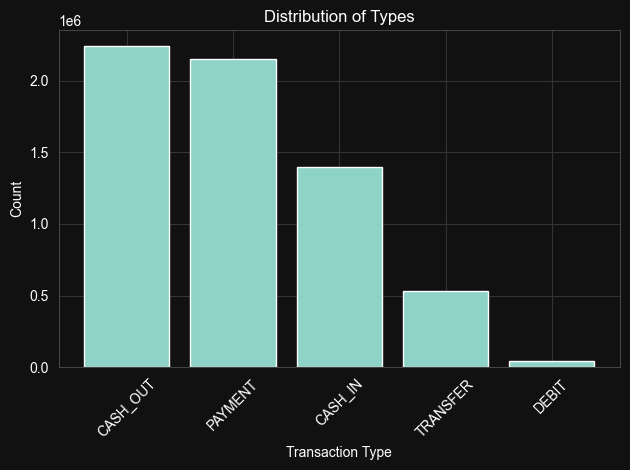

In [14]:
type_counts = df['type'].value_counts()

plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Types')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [15]:
fraud_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

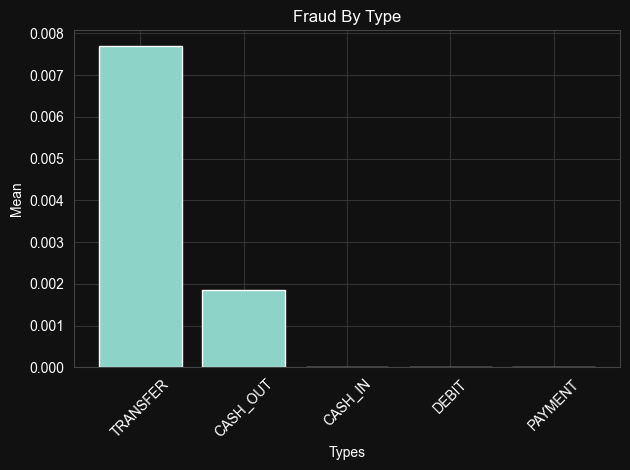

In [16]:
plt.bar(fraud_by_type.index, fraud_by_type.values)
plt.xlabel('Types')
plt.ylabel('Mean')
plt.title('Fraud By Type')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [17]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

In [18]:
df['amount'].median()

np.float64(74871.94)

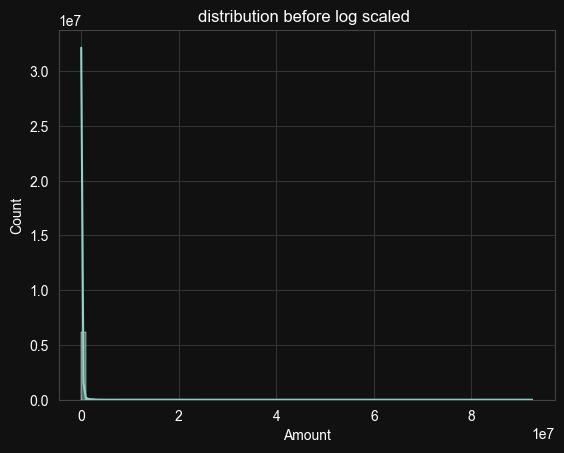

In [19]:
sns.histplot(df['amount'], bins = 100, kde = True)
plt.title("distribution before log scaled ")
plt.xlabel("Amount")
plt.show()

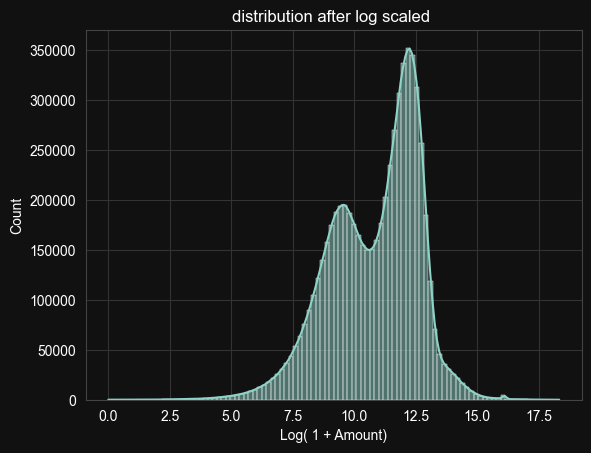

In [20]:
sns.histplot(np.log1p(df['amount']), bins = 100, kde = True)
plt.title("distribution after log scaled ")
plt.xlabel("Log( 1 + Amount)")
plt.show()

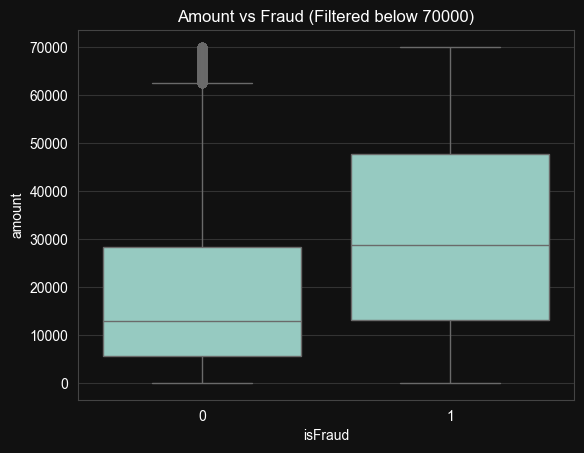

In [21]:
sns.boxplot(data = df[df['amount'] < 70000], x = 'isFraud', y = 'amount')
plt.title("Amount vs Fraud (Filtered below 70000)")
plt.show()

In [22]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

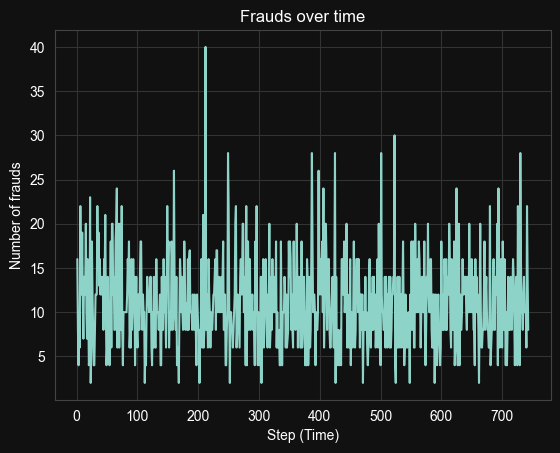

In [23]:
frauds_per_Step = df[df['isFraud'] == 1]['step'].value_counts().sort_index()

plt.plot(frauds_per_Step.index, frauds_per_Step.values, label = "fraud per step")
plt.title("Frauds over time")
plt.xlabel("Step (Time)")
plt.ylabel("Number of frauds")
plt.grid(True)
plt.show()
# we gain that it is time independent so let's drop it

In [24]:
df.drop(columns = 'step', inplace=True)

In [25]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [26]:
top_recievers = df['nameDest'].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [27]:
fraud_users = df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)
fraud_users

nameDest
C967226405     2
C1601170327    2
C650699445     2
C105660024     2
C1981613973    2
C803116137     2
C505532836     2
C964377943     2
C200064275     2
C1259079602    2
Name: count, dtype: int64

In [28]:
transfer_and_cash_out_df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [29]:
transfer_and_cash_out_df['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

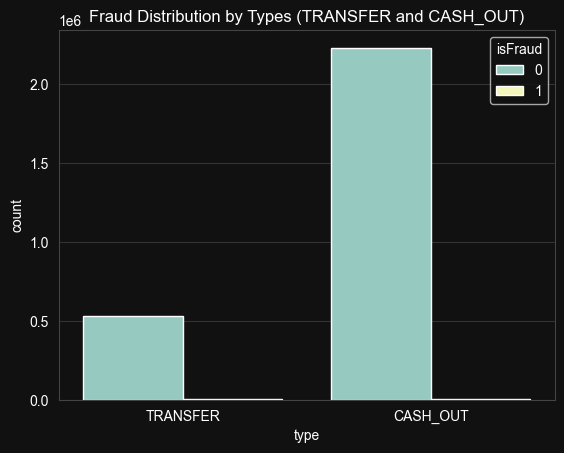

In [30]:
sns.countplot(data = transfer_and_cash_out_df, x ='type', hue = 'isFraud')
plt.title("Fraud Distribution by Types (TRANSFER and CASH_OUT)")
plt.show()

In [31]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [32]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

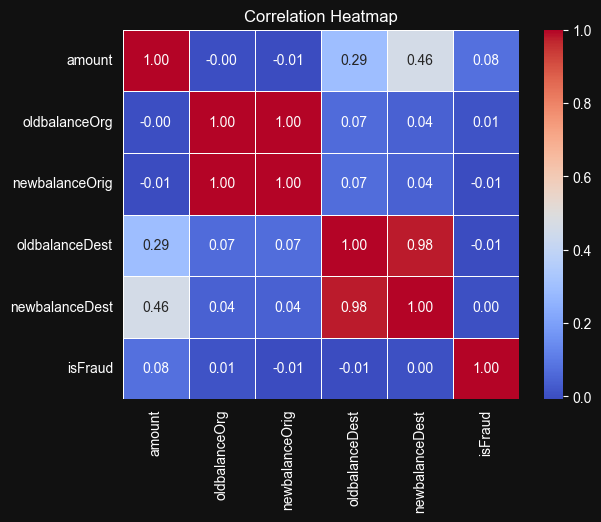

In [33]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")

In [34]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) & 
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
]

In [35]:
len(zero_after_transfer)

1188074

In [36]:
zero_after_transfer.sample(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
516902,CASH_OUT,129912.73,C2013857121,15568.00,0.0,C348485616,0.00,129912.73,0,0,15568.00,129912.73
369566,CASH_OUT,516517.30,C1160921253,204813.00,0.0,C834334360,177239.68,693756.98,0,0,204813.00,516517.30
2662491,CASH_OUT,436885.63,C979768321,9048.00,0.0,C433183062,2539362.49,2976248.12,0,0,9048.00,436885.63
3876424,CASH_OUT,228800.87,C1483144434,9154.83,0.0,C836148567,1888407.39,2117208.26,0,0,9154.83,228800.87
4245642,TRANSFER,134057.04,C74040572,74179.00,0.0,C1352224973,2159221.65,2293278.68,0,0,74179.00,134057.03


# Modeling

In [37]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [38]:
df_modeling = df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

In [39]:
df_modeling.head()  

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [40]:
cat = ['type']
num = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [41]:
x = df_modeling.drop(columns='isFraud')
y = df_modeling['isFraud']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(), cat)
    ]
) 

In [44]:
pipeline  = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

In [45]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [46]:
ypred = pipeline.predict(x_test)

In [47]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [48]:
pipeline.score(x_test, y_test) * 100

94.67064406381857

In [49]:
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')

['fraud_detection_pipeline.pkl']